# Analisis de Ciudades

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [80]:
def min_threshold(df, threshold):
    '''Funcion para filtrar por una minima cantidad de datos'''
    return df["id"].count() > threshold

#Filtro la informacion a ciudades de mas de 400 propiedades

df = df.groupby('ciudad').filter(min_threshold, threshold = 400)
df['ciudad'].value_counts()

Querétaro                      12646
Benito Juárez                  11014
Zapopan                        10360
San Luis Potosí                 7925
Mérida                          7162
                               ...  
Lerma                            459
Irapuato                         449
Santiago                         444
Soledad de Graciano Sánchez      420
Huehuetoca                       418
Name: ciudad, Length: 93, dtype: int64

In [48]:
df["fecha_publicacion"] = pd.to_datetime(df["fecha"])
df["año_publicacion"] = df["fecha_publicacion"].dt.year
df["mes_publicacion"] = df["fecha_publicacion"].dt.month

In [27]:
fechas = df.groupby(['año_publicacion', 'mes_publicacion']).agg({'mes_publicacion': 'size'})
fechas = fechas.rename(columns = {'mes_publicacion':'publicaciones'})
fechas = fechas.reset_index().pivot(index="año_publicacion", columns = "mes_publicacion", values = "publicaciones")
fechas = fechas.T
for año in fechas.columns:
    fechas[año]/=fechas[año].sum()
fechas

año_publicacion,2012,2013,2014,2015,2016
mes_publicacion,,,,,
1,0.064629,0.063668,0.055707,0.082848,0.062069
2,0.056580,0.046067,0.060922,0.073799,0.049477
3,0.046903,0.057113,0.071593,0.076216,0.054427
4,0.061323,0.059358,0.068865,0.073551,0.069528
5,0.078091,0.066638,0.076326,0.071671,0.058259
6,0.064868,0.065805,0.075925,0.073675,0.071627
7,0.082834,0.084166,0.077343,0.076257,0.064076
8,0.162363,0.077828,0.086890,0.088447,0.068980
9,0.112059,0.110785,0.097909,0.094542,0.063209


## ¿Existe crecimiento anual? ¿Existe alguna epoca del año de mayor flujo de propiedades?

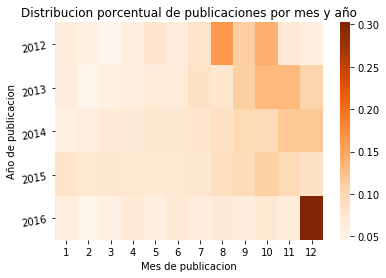

In [30]:
ax = sns.heatmap(fechas.T, cmap="Oranges")
ax.set_yticklabels(ax.get_yticklabels(), rotation=10)
plt.title("Distribucion porcentual de publicaciones por mes y año")
plt.xlabel("Mes de publicacion")
plt.ylabel("Año de publicacion")
ax.set_ylim(5.0, 0)
plt.savefig("figs/heatmap_fechas.png")
plt.show()

## Ciudades - Antiguedad

In [31]:
antiguedades = df.groupby('ciudad').agg({'antiguedad': 'mean', 'ciudad': 'size'})
antiguedades.rename(columns = {'antiguedad' : 'antiguedad_promedio','ciudad':'cantidad_de_propiedades'}, inplace = True)
antiguedades.sort_values('antiguedad_promedio', ascending = False)
# Antiguedades promedio, ciudades +- viejas

,antiguedad_promedio,cantidad_de_propiedades
ciudad,,
Gustavo A. Madero,16.052927,3141
Iztacalco,15.459001,1207
Coyoacán,15.118539,5293
Venustiano Carranza,14.882995,1457
Nezahualcóyotl,14.783756,1055
...,...,...
San Pedro Cholula,2.260391,1029
Los Cabos,1.439516,759
San Andrés Cholula,1.389117,3805


In [46]:
grandes_ciudades = df.groupby('ciudad').filter(min_threshold, threshold = 7000)
antiguedades_ciudades = grandes_ciudades.groupby(['ciudad', 'antiguedad']).agg({'ciudad':'size'})
antiguedades_ciudades = antiguedades_ciudades.rename(columns = {'ciudad':'cantidades'}).reset_index()
antiguedades_ciudades = antiguedades_ciudades.reset_index().pivot('ciudad', 'antiguedad', 'cantidades')

for antiguedad in antiguedades_ciudades.columns:
    antiguedades_ciudades[antiguedad]/=antiguedades_ciudades[antiguedad].sum()

antiguedades_ciudades = antiguedades_ciudades.T.iloc[:20].T
antiguedades_ciudades

antiguedad,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0
ciudad,,,,,,,,,,,,,,,,,,,,
Benito Juárez,0.139381,0.188008,0.225248,0.209741,0.255358,0.300532,0.278481,0.373702,0.280453,0.234899,0.295008,0.173077,0.210526,0.200000,0.160714,0.216000,0.283333,0.260870,0.074074,0.076923
Mérida,0.192475,0.201558,0.116337,0.084053,0.088181,0.070754,0.120253,0.072664,0.076487,0.100671,0.077536,0.230769,0.092105,0.050000,0.071429,0.122667,0.066667,0.043478,0.024691,0.076923
Querétaro,0.311805,0.319106,0.311056,0.386489,0.314146,0.222050,0.343882,0.304498,0.297450,0.308725,0.184280,0.243590,0.355263,0.466667,0.375000,0.240000,0.316667,0.217391,0.345679,0.384615
San Luis Potosí,0.160409,0.141599,0.106436,0.073056,0.075934,0.080027,0.128692,0.093426,0.164306,0.147651,0.071429,0.185897,0.118421,0.066667,0.142857,0.160000,0.133333,0.108696,0.172840,0.192308
Zapopan,0.195930,0.149729,0.240924,0.246661,0.266381,0.326636,0.128692,0.155709,0.181303,0.208054,0.371747,0.166667,0.223684,0.216667,0.250000,0.261333,0.200000,0.369565,0.382716,0.269231


## ¿Son parejas las antiguedades para ciudades en distintas condiciones?

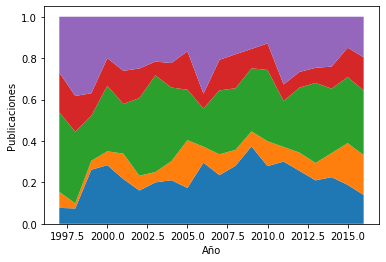

In [45]:
ax = plt.stackplot(list(map(lambda x:2016-x, list(antiguedades_ciudades.columns))),antiguedades_ciudades)
plt.xlabel('Año')
plt.ylabel('Publicaciones')
plt.show()

# Horrible este plot, meu deus

## ¿Existen patrones para cantidad de habitaciones por ciudad?

In [34]:
habitaciones = df.groupby(['ciudad','habitaciones']).agg({'habitaciones':'size', 'precio':'mean'})
habitaciones

habitaciones        precio
ciudad             habitaciones                            
Acapulco de Juárez 1.0                    109  1.185437e+06
                   2.0                    754  1.374582e+06
                   3.0                   1078  2.791943e+06
                   4.0                    315  5.201431e+06
                   5.0                     61  3.336639e+06
...                                       ...           ...
Zapopan            5.0                    199  3.966445e+06
                   6.0                     37  3.240405e+06
                   7.0                     17  3.451176e+06
                   8.0                      8  5.236250e+06
                   10.0                     5  4.469000e+06

[789 rows x 2 columns]

## La cercania a un centro comercial tiene un impacto positivo en el precio de una propiedad para cualquier ciudad

In [64]:
precios_promedio_por_ciudad = df.groupby('ciudad').agg({'precio':'mean'})
precios_promedio_por_ciudad_con_comercio = df[df['centroscomercialescercanos'] == 1].groupby('ciudad').agg({'precio':'mean'})

## ¿Es el nivel de oferta una variable que afecte al valor del metro cuadrado cubierto?

Text(0, 0.5, 'Cantidad de publicaciones del mes')

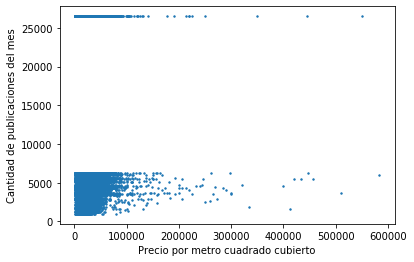

In [114]:
plt.scatter(df['precio']/df['metroscubiertos'], df.groupby(['mes_publicacion', 'año_publicacion'])['mes_publicacion'].transform('count'), s=2)
plt.xlabel('Precio por metro cuadrado cubierto')
plt.ylabel('Cantidad de publicaciones del mes')

Text(0, 0.5, 'Cantidad de publicaciones del mes')

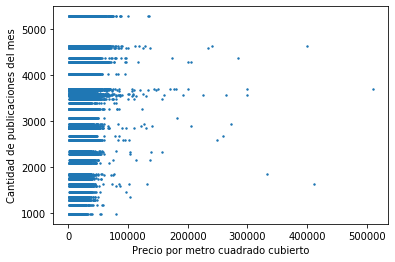

In [136]:
sin_outlier_mes = df.loc[lambda x:(x['año_publicacion'] != 2016) & (x['mes_publicacion'] != 12),].groupby(['mes_publicacion', 'año_publicacion'])['mes_publicacion'].transform('count')
sin_outlier_precio = df.loc[lambda x:(x['año_publicacion'] != 2016) & (x['mes_publicacion'] != 12),['precio','metroscubiertos']]

plt.scatter(sin_outlier_precio['precio']/sin_outlier_precio['metroscubiertos'], sin_outlier_mes, s=2)
plt.xlabel('Precio por metro cuadrado cubierto')
plt.ylabel('Cantidad de publicaciones del mes')

¿A mayor cantidad de publicaciones mensuales, mayor dispersion en los precios y mayor precio promedio?

Ideas a implementar: 
- Dividir a las ciudades en 4 zonas (N-O-S-E) y utilizar colores para los mismos y ver si hay relaciones espaciales
- Agregar una curva para los valores promedios de cada barra de puntos para ver el desvio
